# Test de rangos con signo de Wilcoxon

**Autor**: Juan R. Rico

**Asignatura**: Desafíos de programación


## Descripción

En aprendizaje automático es común verificar si los resultados de dos experimentos distintos son equivalentes, o por el contrario, uno es mejor que el otro. Para ello podemos usar el test de Wilcoxon (wilcox.test) para averiguarlo. 


## Ejemplo de un par de vectores 'x' e 'y' las tasas de acierto correspondientes a una validación cruzada de 10 particiones.

Supongamos que se trata de los porcentajes de aciertos de dos clasificadores ante los mismos datos.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

maeBowA1=np.array([0.2653, 0.2568, 0.2758, 0.2874, 0.2842, 0.2821, 0.2526, 0.2737, 0.2653, 0.3095])
rsmeBowA1=np.array([0.3832, 0.3558, 0.4042, 0.4158, 0.4189, 0.4063, 0.3642, 0.4232, 0.3663, 0.4695])
maeBowA2=np.array([0.2226, 0.2173, 0.2218, 0.2308, 0.2235, 0.2377, 0.2324, 0.2324, 0.2227, 0.2302])
rsmeBowA2=np.array([0.2584, 0.2532, 0.2532, 0.2696, 0.2564, 0.2765, 0.2578, 0.2788, 0.2541, 0.2661])

maeSeqA1=np.array([0.2832, 0.2674, 0.2895, 0.3116, 0.2989, 0.3063, 0.28, 0.2947, 0.2726, 0.3242])
rsmeSeqA1=np.array([0.3947, 0.3663, 0.4032, 0.4526, 0.4463, 0.4411, 0.3979, 0.4526, 0.3947, 0.4842])
maeSeqA2=np.array([0.2838, 0.2547, 0.2651, 0.2883, 0.2848, 0.2833, 0.2788, 0.2773, 0.2661, 0.2511])
rsmeSeqA2=np.array([0.3525, 0.3025, 0.3234, 0.357, 0.349, 0.349, 0.3341, 0.343, 0.3199, 0.2735])



x = maeBowA2
y = maeSeqA2

Gráfica de los datos

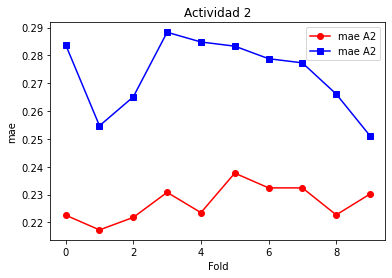

In [8]:
plt.plot(range(10),x,'ro-',label='mae A2')
plt.plot(range(10),y,'bs-',label='mae A2')
plt.title('Actividad 2')
plt.ylabel('mae')
plt.xlabel('Fold')
plt.legend()

Queremos comprobar si los resutados de 'x' son mejores (en este caso mayores) que los de 'y'.

In [9]:
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import wilcoxon

wilcox_W, p_value =  wilcoxon(x, y, alternative='less', zero_method='wilcox', correction=False)

print('Resultado completo del test de Wilcoxon')
print(f'Wilcox W: {wilcox_W}, p-value: {p_value:.2f}')

wilcox_W, p_value =  wilcoxon(x, y, alternative='two-sided')
print('- Two-sided:')
print(f'W: {wilcox_W} | p-value: {p_value:.2f}',end=' | ')
if p_value<0.05:
  print('NO son iguales.')
else:
  print('Son iguales.')

wilcox_W, p_value =  wilcoxon(x, y, alternative='greater')
print('- Greater:')
print(f'W: {wilcox_W} | p-value: {p_value:.2f}',end=' | ')
if p_value<0.05:
  print('X es mayor que Y.')
else:
  print('X NO es mayor que Y.')

wilcox_W, p_value =  wilcoxon(x, y, alternative='less')
print('- Less:')
print(f'W: {wilcox_W} | p-value: {p_value:.2f}',end=' | ')
if p_value<0.05:
  print('X es menor que Y.')
else:
  print('X NO es menor que Y.')


Resultado completo del test de Wilcoxon
Wilcox W: 0.0, p-value: 0.00
- Two-sided:
W: 0.0 | p-value: 0.00 | NO son iguales.
- Greater:
W: 0.0 | p-value: 1.00 | X NO es mayor que Y.
- Less:
W: 0.0 | p-value: 0.00 | X es menor que Y.


El resultado p-value nos indica si las distribuciones son o no distintas ya que examina dos colas. Pero si únicamente queremos saber si una es mejor que la otra tenemos el parámetro `greater` o `less` según comparemos si 'x' > 'y', o 'x' <'y', respectivamente.

En este caso como el p-value es 0.01 < 0.05, rechazamos la hipótesis nula y determinamos que 'x' es mayor que 'y' con una confianza mayor del 95%.